# SDSS Stripe 82 QSO Light Curve Data
Data Source: http://faculty.washington.edu/ivezic/cmacleod/qso_dr7/Southern.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Master File
Format: http://faculty.washington.edu/ivezic/cmacleod/qso_dr7/Southern_format_m.html

In [3]:
df_s82 = pd.read_csv('../data/SDSS/Stripe 82/master_QSO_S82.csv')
print(df_s82.shape)
df_s82.head()

(8974, 74)


,SDSS,RAdeg,DEdeg,z,B-umag,e_B-umag,B-gmag,e_B-gmag,B-rmag,e_B-rmag,...,T-gmag,e_T-gmag,T-rmag,e_T-rmag,T-imag,e_T-imag,T-zmag,e_T-zmag,SpOID,OName
0,000840.63+011419.1,2.169302,1.238649,1.0730,20.793,0.074,20.469,0.028,20.197,0.031,...,20.599,0.026,20.302,0.031,20.169,0.050,20.085,0.178,3.070350e+17,
1,000421.84+005743.6,1.091028,0.962126,0.7867,20.790,0.097,20.183,0.040,19.849,0.024,...,20.689,0.040,20.342,0.046,20.190,0.060,19.749,0.131,3.070350e+17,
2,000119.50+001038.0,0.331289,0.177230,1.6199,20.892,0.102,20.554,0.028,20.431,0.035,...,20.254,0.027,20.284,0.039,20.170,0.047,19.920,0.169,3.073160e+17,
3,000527.52-000556.2,1.364696,-0.098956,0.6125,20.098,0.046,19.722,0.025,19.784,0.031,...,19.144,0.010,19.169,0.011,19.016,0.015,18.891,0.053,1.094350e+17,SDSS J000527.52-000556.2
4,000053.17-001732.9,0.221552,-0.292485,2.7563,20.707,0.086,19.663,0.024,19.610,0.021,...,19.763,0.019,19.704,0.023,19.655,0.030,19.428,0.100,1.930350e+17,


## Import Database File
Format: http://faculty.washington.edu/ivezic/cmacleod/qso_dr7/Southern_format_DB.html<br>
Features: dbID, ra, dec, SDR5ID, M_i, M_i_corr, redshift, mass_BH, L_bol, ugriz, Au

In [4]:
df_s82ID = pd.read_csv('../data/SDSS/Stripe 82/DB_QSO_S82.dat',
                     sep=' ',
                     skiprows=1,
                     skipinitialspace=True
                    )
print(df_s82ID.shape)
dbIDs = df_s82ID.dbID.to_numpy()
df_s82ID.head()

(9258, 15)


,dbID,ra(deg_J2000),dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH(log(M/M_sun)),Lbol(log(ergs/s)),u,g,r,i,z,Au
0,70,2.169302,1.238649,301,-23.901,-24.181,1.0730,0.000,0.000,20.793,20.469,20.197,20.040,20.000,0.116
1,98,1.091028,0.962126,144,-23.399,-23.576,0.7867,0.000,0.000,20.790,20.183,19.849,19.818,19.430,0.183
2,233,0.331289,0.177230,58,-24.735,-25.058,1.6199,0.000,0.000,20.892,20.554,20.431,20.199,20.099,0.154
3,1018,1.364696,-0.098956,190,-23.121,-24.045,0.6125,0.000,45.433,20.098,19.722,19.784,19.485,19.541,0.178
4,1310,0.221552,-0.292485,36,-26.451,-26.974,2.7563,9.361,46.760,20.707,19.663,19.610,19.705,19.529,0.174


## Import Light Curves
##### as dataframes via dbID and collect in list all_df. Loop through dbIDs, read in each IDs measurements, append to all_df.  
<br>
all_df: &nbsp; List of dataframes of each source's measurements  
N: &nbsp; Number of sources / length of all_df  
<br>
Format: http://faculty.washington.edu/ivezic/cmacleod/qso_dr7/Southern_format_LC.html<br>
Note: Bad observations are printed as '-99.99' and converted to NaN

In [7]:
all_df = []

for i in dbIDs:
    df = pd.read_csv('../data/SDSS/Stripe 82/QSO_S82/'+str(i), 
                     sep=' ', 
                     names=['MJD_u','u','u_err','MJD_g','g','g_err','MJD_r','r','r_err','MJD_i','i','i_err','MJD_z','z','z_err','ra_median','decl_median'],
                     na_values=['-99.99','99.999']
                    )
    all_df.append(df)

N = len(all_df)
print('Number of sources: ',N)

Number of sources:  9258


In [6]:
all_df[1].head()

,MJD_u,u,u_err,MJD_g,g,g_err,MJD_r,r,r_err,MJD_i,i,i_err,MJD_z,z,z_err,ra_median,decl_median
0,51819.357715,20.987,0.115,51819.359381,20.369,0.025,51819.356048,20.020,0.026,51819.356881,19.974,0.037,51819.358548,19.720,0.105,1.091032,0.962119
1,52558.323000,20.517,0.091,52558.324666,20.152,0.022,52558.321333,19.776,0.021,52558.322166,19.770,0.030,52558.323833,19.489,0.075,1.091032,0.962119
2,52577.210500,20.749,0.075,52577.212166,20.113,0.018,52577.208833,19.811,0.020,52577.209666,19.758,0.028,52577.211333,19.574,0.086,1.091032,0.962119
3,52586.213979,20.753,0.082,52586.215645,20.170,0.019,52586.212312,19.806,0.021,52586.213145,19.767,0.033,52586.214812,19.356,0.087,1.091032,0.962119
4,52910.294461,21.135,0.095,52910.296127,20.486,0.024,52910.292794,20.071,0.021,52910.293627,19.975,0.031,52910.295294,19.737,0.090,1.091032,0.962119


## Remove incorrect MJD first observations
##### 4 cases of incorrect MJD_x values are identified and removed: 2922, 2955, 3898, 9226.  
<br>
Loop through N sources, loop through each band's MJD, append first MJD to first_mjd list.<br>
Extract bad first_mjds where < 1000, divide by 5 (bands), and remove redundancies across bands.<br>
Loop through bad_first sources, drop measurements with incorrect first MJD for all bands, and reset dataframe index.<br>


In [8]:
first_mjd = [];
cols = ['MJD_u', 'MJD_g', 'MJD_r', 'MJD_i', 'MJD_z'];
for i in range(N):
    for col in cols:
        first_mjd.append(all_df[i][col][0])

bad_first = np.unique(np.where(np.array(first_mjd) < 1000)[0]//5)

for bf in bad_first:
    all_df[bf] = all_df[bf].drop([0]).reset_index()

## Set bad observations to NaN

##### Erroneous mag values are removed via heuristic thresholds
<br>
Loop through N sources and ugriz bands, create 2 condition masks, set bad observations to NaN.

In [7]:
for i in range(N):
    for band in ['u','g','r','i','z']:
        c1 = all_df[i][band]>90;
        c2 = all_df[i][band]<-60;
        all_df[i].loc[c1|c2, band] = np.nan

## Check number of detections
<br><br>
Loop through N sources and record number of observations (.shape[0]) for each source.

In [19]:
ndet = []
for i in range(N):
    ndet.append(all_df[i].shape[0])
ndet = np.asarray(ndet);

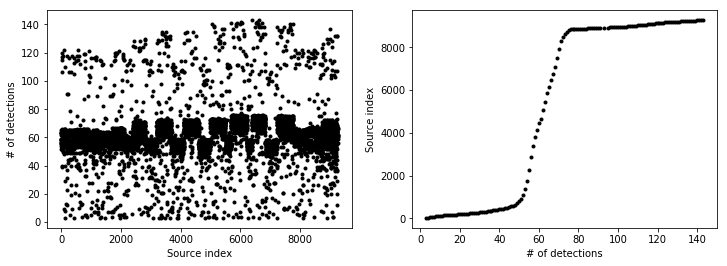

In [24]:
x, y = np.unique(ndet, return_counts=True);
plt.figure(figsize=(12,4));
plt.subplot(1,2,1);
plt.plot(ndet, 'k.'); plt.xlabel('Source index'); plt.ylabel('# of detections');
plt.subplot(1,2,2);
plt.scatter(x=x, y=np.cumsum(y), color='black', marker='.'); plt.xlabel('# of detections'); plt.ylabel('Source index');

In [10]:
print('mean: %.2f'%ndet.mean())
print('median: %.2f'%np.median(ndet))
print('std: %.2f'%ndet.std())
print('max: %.2f'%ndet.max())
print('min: %.2f'%ndet.min())

mean: 61.92
median: 61.00
std: 15.86
max: 143.00
min: 3.00


# Export Data
Fixed length (# of observations)

In [12]:
threshold = 50;
mask = ndet >= threshold;
print('light curves with # of observations >='+str(threshold)+': ', sum(mask));

lcs = [];
for i in range(N):
    if mask[i]:
        lcs.append(all_df[i][['MJD_u','u','u_err','g','g_err','r','r_err','i','i_err','z','z_err']].to_numpy()[:threshold])
lcs = np.asarray(lcs);
lcs.shape

light curves with # of observations >=50:  8550


(8550, 50, 11)

In [13]:
np.save('../data/SDSS/Stripe 82/lc_n50', lcs)

In [14]:
lcs[22,:,1]

array([19.368, 19.492, 19.504, 19.325, 19.359, 19.342, 19.331, 19.292,
       19.349, 19.368, 19.518, 19.768, 19.985, 19.699, 19.687, 21.453,
       19.594, 19.666, 19.529, 19.561, 19.545, 19.549, 19.593, 19.592,
       19.484, 19.596, 19.591, 19.577, 19.547, 19.177, 19.299,    nan,
       19.279,    nan, 19.204, 19.183, 19.153,    nan, 19.194, 19.303,
       19.183, 19.22 ,    nan, 19.301, 19.231,    nan, 19.195, 19.277,
          nan, 19.262])

## Check Observations

### u - band

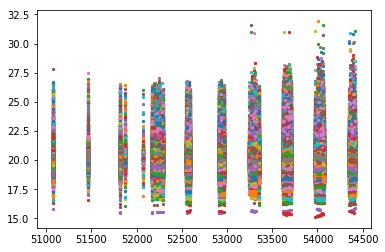

In [11]:
for i in range(N):
    plt.scatter(x=all_df[i].MJD_u.to_numpy(),
                y=all_df[i].u.to_numpy(),
                s=5
               )

### g - band

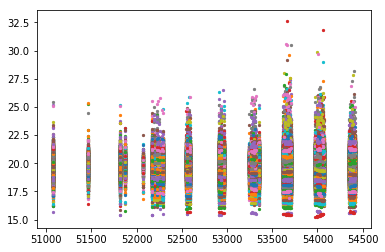

In [11]:
for i in range(N):
    plt.scatter(x=all_df[i].MJD_g.to_numpy(),
                y=all_df[i].g.to_numpy(),
                s=5
               )

### r - band

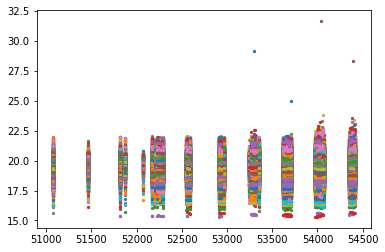

In [12]:
for i in range(N):
    plt.scatter(x=all_df[i].MJD_r.to_numpy(),
                y=all_df[i].r.to_numpy(),
                s=5
               )

### i - band

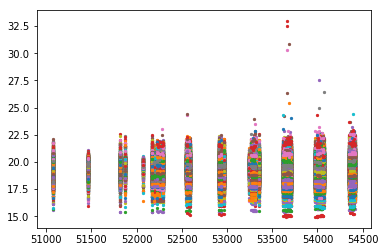

In [13]:
for i in range(N):
    plt.scatter(x=all_df[i].MJD_i.to_numpy(),
                y=all_df[i].i.to_numpy(),
                s=5
               )

### z - band

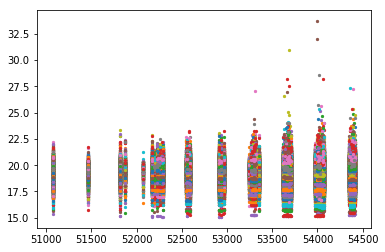

In [14]:
for i in range(N):
    plt.scatter(x=all_df[i].MJD_z.to_numpy(),
                y=all_df[i].z.to_numpy(),
                s=5
               )

<br><br><br>
## Check mag errors

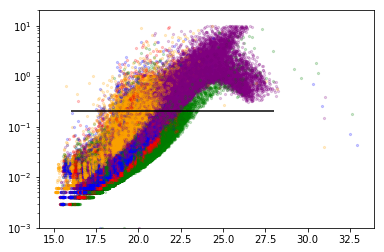

In [15]:
for i in range(1, 8000):
    plt.scatter(x=all_df[i].u.to_numpy(),
                y=all_df[i].u_err.to_numpy(),
                c='purple', s=5, alpha=0.2
               )
    plt.scatter(x=all_df[i].g.to_numpy(),
                y=all_df[i].g_err.to_numpy(),
                c='green', s=5, alpha=0.2
               )
    plt.scatter(x=all_df[i].r.to_numpy(),
                y=all_df[i].r_err.to_numpy(),
                c='red', s=5, alpha=0.2
               )
    plt.scatter(x=all_df[i].i.to_numpy(),
                y=all_df[i].i_err.to_numpy(),
                c='blue', s=5, alpha=0.2
               )
    plt.scatter(x=all_df[i].z.to_numpy(),
                y=all_df[i].z_err.to_numpy(),
                c='orange', s=5, alpha=0.2
               )
plt.hlines(y=0.2, xmin=16, xmax=28)
plt.yscale('log')
plt.ylim(10**(-3),20);

### u - band

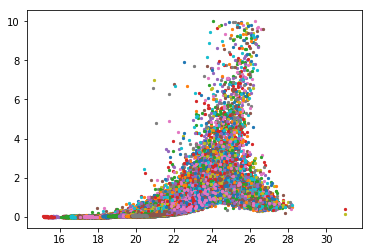

In [15]:
for i in range(N):
    plt.scatter(x=all_df[i].u.to_numpy(),
                y=all_df[i].u_err.to_numpy(),
                s=5
               )

### g - band

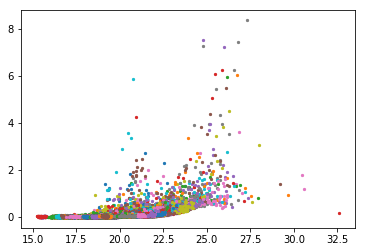

In [16]:
for i in range(N):
    plt.scatter(x=all_df[i].g.to_numpy(),
                y=all_df[i].g_err.to_numpy(),
                s=5
               )

### r - band

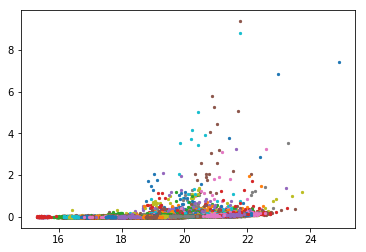

In [17]:
for i in range(N):
    plt.scatter(x=all_df[i].r.to_numpy(),
                y=all_df[i].r_err.to_numpy(),
                s=5
               )

### i - band

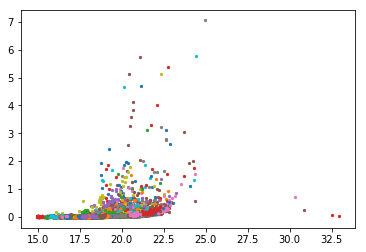

In [18]:
for i in range(N):
    plt.scatter(x=all_df[i].i.to_numpy(),
                y=all_df[i].i_err.to_numpy(),
                s=5
               )

### z - band

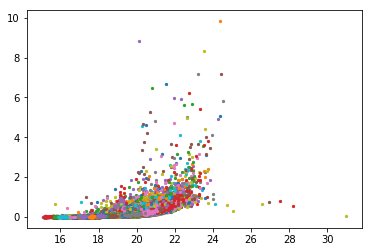

In [19]:
for i in range(N):
    plt.scatter(x=all_df[i].z.to_numpy(),
                y=all_df[i].z_err.to_numpy(),
                s=5
               )

In [156]:
erls = [];
for i in range(50):
    erls.append(sum(all_df[i]['u_err']>90))

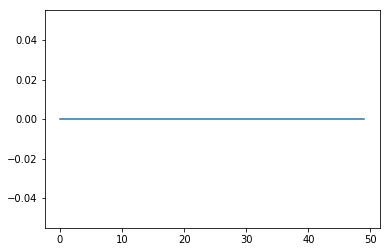

In [157]:
plt.plot(erls)

## Quality Cuts
#### Mag error cutoff

In [ ]:
for i in range(N):
    for band in ['u_err','g_err','r_err','i_err','z_err']:
        c1 = all_df[i][band]>0.2;
        all_df[i].loc[c1, band] = np.nan

#### Mag cutoff

In [ ]:
for i in range(N):
    for band in ['u','g','r','i','z']:
        c1 = all_df[i][band]>22;
        all_df[i].loc[c1, band] = np.nan

## Remove rows with NaNs

In [146]:
#for i in range(N):
#    all_df[i] = all_df[i].dropna()

<br><br><br>
## Check incorrect MJD in first observations

In [55]:
first_mjd = [];
cols = ['MJD_u', 'MJD_g', 'MJD_r', 'MJD_i', 'MJD_z'];
for i in range(N):
    for col in cols:
        first_mjd.append(all_df[i][col][0])

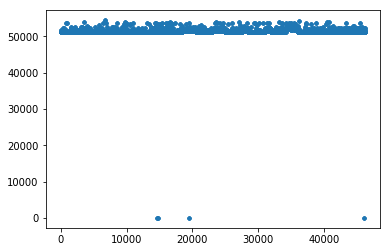

In [106]:
plt.plot(first_mjd, '.')

In [57]:
bad_first = np.unique(np.where(np.array(first_mjd) < 1000)[0]//5)
bad_first

array([2922, 2955, 3898, 9226], dtype=int64)

In [58]:
for bf in bad_first:
    all_df[bf] = all_df[bf].drop([0]).reset_index()

In [61]:
all_df[bad_first[1]]

,index,MJD_u,u,u_err,MJD_g,g,g_err,MJD_r,r,r_err,MJD_i,i,i_err,MJD_z,z,z_err,ra_median,decl_median
0,1,52172.302395,19.760,0.039,52172.304061,18.776,0.010,52172.300728,18.254,0.008,52172.301561,18.076,0.009,52172.303228,17.965,0.024,-24.508439,-1.058616
1,2,52172.352569,19.813,0.045,52172.354235,18.790,0.010,52172.350902,18.252,0.008,52172.351735,18.072,0.009,52172.353402,17.947,0.023,-24.508439,-1.058616
2,3,52558.252100,19.673,0.036,52558.253766,18.633,0.009,52558.250433,18.184,0.008,52558.251266,18.034,0.008,52558.252933,17.910,0.020,-24.508439,-1.058616
3,4,52577.139594,19.603,0.034,52577.141260,18.621,0.009,52577.137927,18.174,0.008,52577.138760,18.023,0.009,52577.140427,17.939,0.025,-24.508439,-1.058616
4,5,52586.143072,19.703,0.033,52586.144738,18.642,0.008,52586.141405,18.175,0.008,52586.142238,18.009,0.009,52586.143905,17.893,0.021,-24.508439,-1.058616
5,6,52931.153754,19.550,0.031,52931.155420,18.575,0.008,52931.152087,18.180,0.007,52931.152920,18.016,0.008,52931.154587,17.937,0.021,-24.508439,-1.058616
6,7,52935.150718,19.543,0.035,52935.152384,18.562,0.008,52935.149051,18.162,0.008,52935.149884,17.993,0.008,52935.151551,17.923,0.022,-24.508439,-1.058616
7,8,53313.143920,19.854,0.045,53313.145586,18.767,0.010,53313.142253,18.301,0.009,53313.143086,18.108,0.011,53313.144753,17.983,0.025,-24.508439,-1.058616
8,9,53622.253162,19.786,0.049,53622.254828,18.753,0.010,53622.251495,18.252,0.009,53622.252328,18.068,0.010,53622.253995,17.953,0.027,-24.508439,-1.058616
9,10,53625.249128,19.727,0.037,53625.250794,18.726,0.015,53625.247461,18.220,0.015,53625.248294,18.029,0.015,53625.249961,17.937,0.024,-24.508439,-1.058616


In [62]:
first_mjd2 = [];
cols = ['MJD_u', 'MJD_g', 'MJD_r', 'MJD_i', 'MJD_z'];
for i in range(N):
    for col in cols:
        first_mjd2.append(all_df[i][col][0])

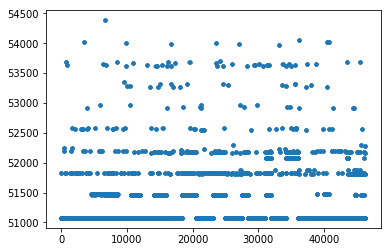

In [104]:
plt.plot(first_mjd2, '.')

### Filter Bad Observations

In [ ]:
for i in range(N):
    all_df[i][['u','u_err','MJD_u']].dropna().to_numpy()

In [126]:
all_df[22][['u','u_err','MJD_u']].dropna().to_numpy()

array([[1.93680000e+01, 2.80000000e-02, 5.10753031e+04],
       [1.94920000e+01, 3.50000000e-02, 5.18193580e+04],
       [1.95040000e+01, 3.90000000e-02, 5.25583232e+04],
       [1.93250000e+01, 2.90000000e-02, 5.25772107e+04],
       [1.93590000e+01, 3.10000000e-02, 5.25862142e+04],
       [1.93420000e+01, 3.10000000e-02, 5.29102947e+04],
       [1.93310000e+01, 3.20000000e-02, 5.29312249e+04],
       [1.92920000e+01, 2.80000000e-02, 5.29352219e+04],
       [1.93490000e+01, 2.80000000e-02, 5.29591652e+04],
       [1.93680000e+01, 2.70000000e-02, 5.29631449e+04],
       [1.95180000e+01, 3.30000000e-02, 5.33521160e+04],
       [1.97680000e+01, 5.30000000e-02, 5.36223243e+04],
       [1.99850000e+01, 1.34000000e-01, 5.36342738e+04],
       [1.96990000e+01, 6.90000000e-02, 5.36362793e+04],
       [1.96870000e+01, 4.20000000e-02, 5.36383151e+04],
       [2.14530000e+01, 6.37000000e-01, 5.36402791e+04],
       [1.95940000e+01, 7.10000000e-02, 5.36552513e+04],
       [1.96660000e+01, 6.60000

In [102]:
for i in range(N):
    for band in ['u','g','r','i','z']:
        c1 = all_df[i][band]>90;
        c2 = all_df[i][band]<-60;
        all_df[i].loc[c1|c2, band] = np.nan

In [134]:
all_df[22].tail(25)

,MJD_u,u,u_err,MJD_g,g,g_err,MJD_r,r,r_err,MJD_i,i,i_err,MJD_z,z,z_err,ra_median,decl_median
41,54030.253511,19.220,0.030,54030.255177,19.123,0.013,54030.251844,18.893,0.014,54030.252677,18.953,0.018,54030.254344,18.940,0.040,1.175771,0.006504
42,54035.329308,NaN,0.059,54035.330974,19.138,0.015,54035.327641,18.887,0.019,54035.328474,18.932,0.024,54035.330141,18.981,0.100,1.175771,0.006504
43,54037.234751,19.301,0.035,54037.236417,19.106,0.016,54037.233084,18.876,0.014,54037.233917,18.977,0.018,54037.235584,19.044,0.050,1.175771,0.006504
44,54040.249325,19.231,0.041,54040.250991,19.119,0.021,54040.247658,18.891,0.019,54040.248491,18.976,0.021,54040.250158,18.979,0.053,1.175771,0.006504
45,54047.279856,NaN,0.115,54047.281523,19.070,0.052,54047.278190,18.905,0.030,54047.279023,18.875,0.034,54047.280690,NaN,0.120,1.175771,0.006504
46,54049.275703,19.195,0.063,54049.277370,19.127,0.022,54049.274036,18.876,0.018,54049.274870,18.930,0.025,54049.276536,18.839,0.072,1.175771,0.006504
47,54053.240123,19.277,0.037,54053.241789,19.127,0.015,54053.238456,18.896,0.019,54053.239289,18.978,0.021,54053.240956,19.143,0.060,1.175771,0.006504
48,54056.241712,NaN,0.037,54056.243379,19.147,0.021,54056.240046,18.883,0.020,54056.240879,18.943,0.030,54056.242546,19.095,0.072,1.175771,0.006504
49,54062.240915,19.262,0.053,54062.242581,19.157,0.024,54062.239248,18.892,0.018,54062.240081,18.909,0.025,54062.241748,19.119,0.089,1.175771,0.006504
50,54068.221459,NaN,0.053,54068.223125,19.160,0.028,54068.219792,18.896,0.021,54068.220625,18.980,0.025,54068.222292,18.994,0.066,1.175771,0.006504


<br><br><br>
## Check observation times across bands
Time between measurements in different bands are all on the same day and with the same difference:<br>
u-g: 0.0016, g-r: -0.0033, r-i: 0.0008, i-z: 0.0016

In [37]:
ndays = [];
for i in range(N):
    ndays.append(np.unique(all_df[2][['MJD_u','MJD_g','MJD_r','MJD_i','MJD_z']].round().to_numpy(), axis=1).shape[1])

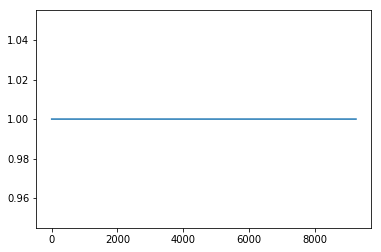

In [47]:
plt.plot(ndays);

In [54]:
difftime = [];
for i in range(N):
    difftime.append(np.diff(all_df[2][['MJD_u','MJD_g','MJD_r','MJD_i','MJD_z']].to_numpy()))
difftime = np.asarray(difftime)

In [51]:
np.max(difftime, axis=1)

array([[ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.001667],
       [ 0.001667, -0.003333,  0.000834,  0.00

In [58]:
difftime.shape

(9258, 59, 4)

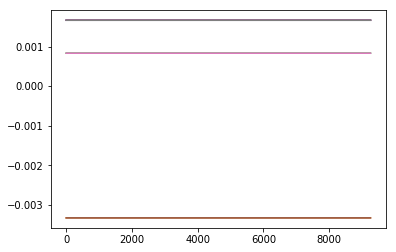

In [56]:
plt.plot(np.max(difftime, axis=1));
plt.plot(np.min(difftime, axis=1));